In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')
mouse = '../resources/mousedrug.csv'
trials = '../resources/trials.csv'

In [3]:
mouse_data = pd.read_csv(mouse)
clin_trials = pd.read_csv(trials)
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
trial_data = pd.merge(mouse_data, clin_trials, on="Mouse ID")

In [5]:
trial_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [6]:
tr_treat = trial_data.groupby(["Drug", "Timepoint"])
tr_mean = tr_treat["Tumor Volume (mm3)"].mean()
tr_mean2 = pd.DataFrame(tr_mean)
tr_mean3 = tr_mean2.reset_index()
tr_mean3.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [7]:
tr_sem = tr_treat["Tumor Volume (mm3)"].sem()
tr_sem2 = pd.DataFrame(tr_sem)
tr_sem3 = tr_sem2.reset_index()
tr_sem3.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [8]:
group_df = trial_data.groupby(["Timepoint", "Drug"])
group_df2 = group_df["Tumor Volume (mm3)"].mean()
group_df3 = pd.DataFrame(group_df2)
group_df4 = group_df3.reset_index()
group_df5 = group_df4.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
group_df5

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [9]:
group_sem1 = trial_data.groupby(["Timepoint", "Drug"])
group_sem2 = group_sem1["Tumor Volume (mm3)"].sem()
group_sem3 = pd.DataFrame(group_sem2)
group_sem4 = group_sem3.reset_index()
group_sem5 = group_sem4.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
group_sem5

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


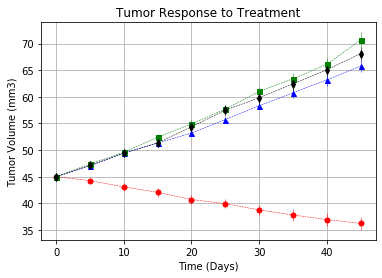

In [24]:
plt.errorbar(group_df5.index, group_df5["Capomulin"], yerr=group_sem5["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(group_df5.index, group_df5["Infubinol"], yerr=group_sem5["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(group_df5.index, group_df5["Ketapril"], yerr=group_sem5["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(group_df5.index, group_df5["Placebo"], yerr=group_sem5["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)

# Save the Figure
plt.savefig("Fig1.png")

# Show the Figure
plt.show()

In [16]:
msites = trial_data.groupby(["Drug", "Timepoint"])
msites2 = msites["Metastatic Sites"].mean()
msites3 = msites2.reset_index()
msites4 = msites3.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
msites4

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [17]:
semsites = trial_data.groupby(["Drug", "Timepoint"])
semsites2 = semsites["Metastatic Sites"].sem()
semsites3 = semsites2.reset_index()
semsites4 = semsites3.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
semsites4

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


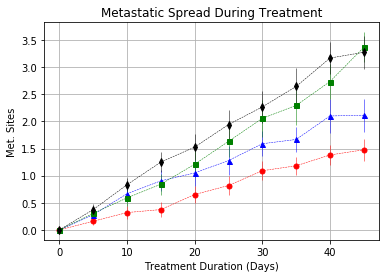

In [23]:
plt.errorbar(msites4.index, msites4["Capomulin"], yerr=semsites4["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(msites4.index, msites4["Infubinol"], yerr=semsites4["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(msites4.index, msites4["Ketapril"], yerr=semsites4["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(msites4.index, msites4["Placebo"], yerr=semsites4["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(True)

# Save the Figure
plt.savefig("Fig2.png")

# Show the Figure
plt.show()

In [19]:
mouseper = trial_data.groupby(["Drug", "Timepoint"])
mouseper2 = mouseper["Mouse ID"].count()
mouseper3 = mouseper2.reset_index()
mouseper4 = mouseper3.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
mouseper4

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


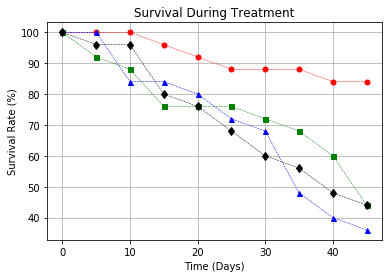

In [22]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * mouseper4["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mouseper4["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mouseper4["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * mouseper4["Placebo"] / 25 , "kd", linestyle="dashed", markersize=6, linewidth=0.50)
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)

# Save the Figure
plt.savefig("Fig3.png")

# Show the Figure
plt.show()

In [16]:
per_change = []
for x in range(10):  
    val1 = group_df5.iloc[9,x] / group_df5.iloc[0,x]
    val2 = round((val1 - 1) / .01, 2)
    per_change.append(val2)
    val1 = 0
    val2 = 0
d_column = trial_data["Drug"].unique()
d_column.sort()
summarydf = pd.DataFrame({"Drug": d_column, "% Change": per_change})

summarydf

,Drug,% Change
0,Capomulin,-19.48
1,Ceftamin,42.52
2,Infubinol,46.12
3,Ketapril,57.03
4,Naftisol,53.92
5,Placebo,51.30
6,Propriva,47.24
7,Ramicane,-22.32
8,Stelasyn,52.09
9,Zoniferol,46.58


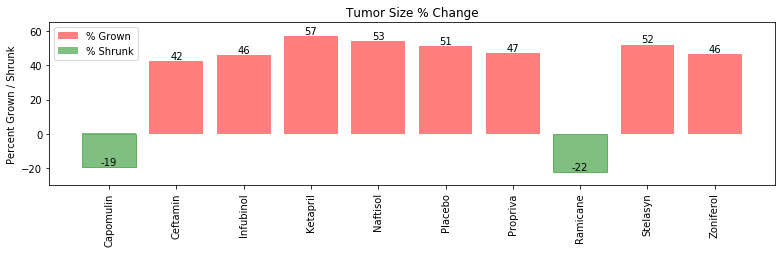

<Figure size 432x288 with 0 Axes>

In [17]:
summarydf2 = summarydf.set_index("Drug")

x_axis = np.arange(len(summarydf2))
width = .8 

fig, ax = plt.subplots(figsize=(13, 3))
rects1 = ax.bar(x_axis, summarydf2["% Change"], width, color='r', alpha=0.5, label="% Grown")
ax.bar(0, width, color='g', alpha=0.5, label="% Shrunk")
plt.title("Tumor Size % Change", fontweight=50)
plt.ylabel("Percent Grown / Shrunk")
plt.ylim(-30, 65)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, summarydf2.index, rotation="vertical")

def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0001*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
plt.legend(loc="upper left")
rects1[0].set_color('g'), rects1[7].set_color('g')
plt.show()
plt.savefig('TumorChange')